In [ ]:
# ....Задание....
# Скачайте вакансии СБЕРа с HH.ru
# Создайте DataFrame только добавьте поле skills
# Переведите даты публикаций в datetime
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
# Постройте график наиболее востребованных навыков

In [ ]:
import requests 
from tqdm.auto import tqdm
from collections import defaultdict
import pandas as pd

In [ ]:
# Создание датафрейма из списка
pd.DataFrame([
    [1,2],
    [2,1]
    ],
    columns=['col1','col2']
    )

,col1,col2
0,1,2
1,2,1


In [ ]:
# Создание датафрейма из словаря
pd.DataFrame({'col1':[1,2], 'col2':[2,1]})

,col1,col2
0,1,2
1,2,1


In [ ]:
# Отправка запроса в api hh.ru
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={page}&per_page={num_per_page}&area={moscow}'
res = requests.get(url)

In [ ]:
# Отправка запроса с параметрами в словаре

In [ ]:
url = f'https://api.hh.ru/vacancies'
params = {
    'employer_id': sber,
    'page': page,
    'per_page': num_per_page,
    'area': moscow
}
res = requests.get(url, params=params)

In [ ]:
 r = res.json()

In [ ]:
r.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

In [ ]:
# r['item']

In [ ]:
msv = r.get('items')

In [ ]:
len(msv)

100

In [ ]:
msv[0].get('employer')

{'id': '3529',
 'name': 'СБЕР',
 'url': 'https://api.hh.ru/employers/3529',
 'alternate_url': 'https://hh.ru/employer/3529',
 'logo_urls': {'240': 'https://hhcdn.ru/employer-logo/5756157.png',
  '90': 'https://hhcdn.ru/employer-logo/5756156.png',
  'original': 'https://hhcdn.ru/employer-logo-original/1033849.png'},
 'vacancies_url': 'https://api.hh.ru/vacancies?employer_id=3529',
 'trusted': True}

In [ ]:
# Создание датафрейма из json
pd.json_normalize(msv[:3])

,id,premium,name,has_test,response_letter_required,salary,address,response_url,sort_point_distance,published_at,...,address.lng,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.id
0,72075640,False,Исполнительный директор - Marketing Team Lead ...,False,False,None,NaN,None,None,2022-11-28T15:52:29+0300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,73392819,False,Frontend developer (СБОЛ.про),False,False,None,NaN,None,None,2022-12-06T13:48:41+0300,...,37.532071,"Москва, Кутузовский проспект, 32",Кутузовская,МЦК,95.536,95,55.740833,37.533333,"[{'station_name': 'Кутузовская', 'line_name': ...",823806
2,71833531,False,Аналитик данных,False,False,None,NaN,None,None,2022-11-28T17:00:15+0300,...,37.531127,"Москва, Кутузовский проспект, 32к1",Кутузовская,Филевская,4.73,4,55.740544,37.534100,"[{'station_name': 'Кутузовская', 'line_name': ...",731097


In [ ]:
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancies = res.json()
num_pages = vacancies.get('pages')
vacancy_ids = [el.get('id') for el in vacancies.get('items')]


In [ ]:
all_vacancy_ids= []
for i in tqdm(range(num_pages)):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}&area={moscow}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)

  0%|          | 0/15 [00:00<?, ?it/s]

In [ ]:
# Запрос по определенному id вакансии
vac_id = 43326020
url = f'https://api.hh.ru/vacancies/{vac_id}'
res = requests.get(url)
vacancy = res.json()


In [ ]:
## Обычный словарь

# tabdict = {
#     'id': [], 
#     'name': [],
# }

In [ ]:

# tabdict['description'] = []

In [ ]:
# Создание словаря со списком по умолчанию
tabdict = defaultdict(list)
for vac_id in tqdm(all_vacancy_ids[:300]):
    url = f'https://api.hh.ru/vacancies/{vac_id}'
    res = requests.get(url)
    vacancy = res.json()
    tabdict['id'].append(vacancy.get('id'))
    tabdict['name'].append(vacancy.get('name'))
    tabdict['description'].append(vacancy.get('description'))
    tabdict['skills'].append(vacancy.get('key_skills'))
    tabdict['published_at'].append(vacancy.get('published_at'))


  0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
df = pd.DataFrame(tabdict)

In [ ]:
df

,id,name,description,skills,published_at
0,55889794,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,,2022-12-07T23:08:00+0300
1,45790891,Менеджер по работе с ключевыми клиентами малог...,<p>Сбер — лучший работодатель России. У нас бо...,Прямые продажи;Финансовый анализ;Клиентоориент...,2022-11-28T18:00:43+0300
2,73524445,Старший охранник,"<p>Сбер – это стабильность, забота о команде и...",,2022-12-08T15:09:43+0300
3,73527561,Тестировщик (СбербанкОнлайн),<p>Наша команда разрабатывает и помогает вывод...,,2022-12-08T15:56:31+0300
4,73131557,Junior QA Engineer,<p>Наша команда делает решение по управлению A...,,2022-11-30T13:04:10+0300
...,...,...,...,...,...
295,73322458,DevOps инженер (СберЧат),"<p>Приглашаем Middle / Senior DevOps инженера,...",Linux;Python;Bash;PostgreSQL;SQL;Kubernetes;Do...,2022-12-05T11:34:01+0300
296,67500653,Старший клиентский менеджер,<p><strong>Старший клиентский менеджер</strong...,Деловая переписка;Деловое общение;Развитие про...,2022-11-28T15:52:13+0300
297,69630798,Frontend-разработчик,<p>Наша команда разрабатывает внутренний порта...,,2022-11-28T09:53:50+0300
298,72225014,Senior С++ Developer,<p><strong>SberDevices</strong> - департамент ...,,2022-11-28T09:49:18+0300


In [ ]:
# Перевод навыков из формата списка со словарями в строку с навыками, разделенными ;
sk = tabdict.get('skills')
tabdict['skills'] = [';'.join([y.get('name') for y in x]) for x in sk]

In [ ]:
df = pd.DataFrame(tabdict)

In [ ]:
# Проверка типа данных в колонке
df.published_at.dtype

dtype('O')

In [ ]:
# Перевод даты из строки в формат datetime
df.published_at = pd.to_datetime(df.published_at)

In [ ]:
# Использование с помощью dt атрибутов объекта datetime для создания новой колонки
df['weekday'] = df.published_at.dt.weekday

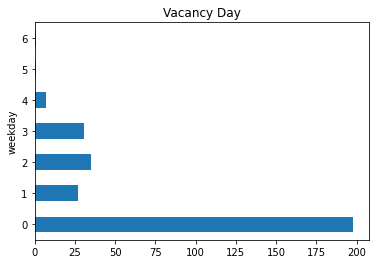

In [ ]:
import matplotlib.pyplot as plt

df.groupby('weekday')['id'].count().plot(kind='barh')
plt.title('Vacancy Day')
plt.show()

In [ ]:
# Пример создания условия для фильтрации датафрейма
term1 = df['name'].str.lower().str.contains("data")

In [ ]:
term2 = df['name'].str.lower().str.contains("scientist")

In [ ]:
# Фильтрация строк датафрейма по нескольким условиям & и | или 
df[term1 | term2]

,id,name,description,skills,published_at,weekday
21,73209857,Junior Data Scientist / Аудитор,<p>В команду Управления внутреннего аудита по ...,,2022-12-01 23:04:16+03:00,3
27,72088729,Стажер Data scientist,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,Python;SQL,2022-11-28 16:59:14+03:00,0
62,72952363,Junior CV Data Scientist,<p>Мы занимаемся разработкой CV-моделей для мо...,,2022-11-28 16:59:15+03:00,0
78,71582181,Junior Data Scientist,<p>Блок «Управление благосостоянием» объединяе...,Python;SQL,2022-11-28 16:59:12+03:00,0
105,72221358,Data scientist (Computer Vision),"<p>В проект департамента, который занимается к...",Python;Computer Vision;PyTorch;Git;Linux,2022-11-11 13:49:03+03:00,4


In [ ]:

skillslist = df[term1 | term2].skills.tolist()

In [ ]:
skillslist_new = []
for x in skillslist:
  skillslist_new.extend(x.split(';'))

In [ ]:
skillslist_new = [x for x in skillslist_new if x != '']

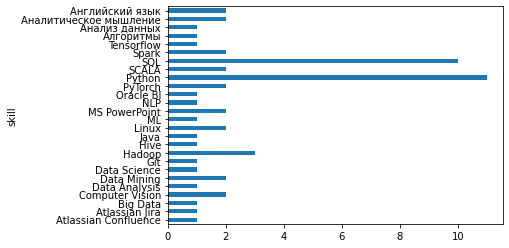

In [ ]:
# Расчет и визуализация частоты встречаемости навыков с помощь groupby
pd.DataFrame(skillslist_new,columns=['skill']).groupby('skill')['skill'].count().plot(kind='barh');

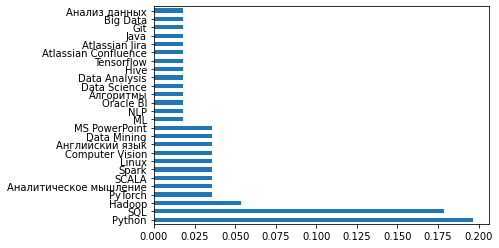

In [ ]:
# Расчет и визуализация частоты встречаемости навыков с помощь value_counts
pd.DataFrame(skillslist_new,columns=['skill']).skill.value_counts(normalize=True).plot(kind='barh');

In [ ]:
# Counter для подсчета элементов в массиве
 from collections import Counter

In [ ]:
c = Counter(skillslist_new)

In [ ]:
#  Сохранение датафрейма в csv файл
pd.DataFrame(c.most_common(10), columns=['skill', 'frequency']).to_csv('skills_frq.csv')

In [ ]:
#  Сохранение датафрейма в excel файл
pd.DataFrame(c.most_common(10), columns=['skill', 'frequency']).to_excel('skills_frq.xlsx', index=False)

In [ ]:
#  Сохранение датафрейма в pickle
pd.DataFrame(c.most_common(10), columns=['skill', 'frequency']).to_pickle('skills_frq.pkl')

In [ ]:
# Сохранение датафрейма в excel файл на разных листах
with pd.ExcelWriter('skills_.xlsx') as writer:
  pd.DataFrame(c.most_common(5), columns=['skill', 'frequency']).to_excel(writer, index=False, sheet_name='five')
  pd.DataFrame(c.most_common(10), columns=['skill', 'frequency']).to_excel(writer, index=False,sheet_name='ten')
  pd.DataFrame(c.most_common(20), columns=['skill', 'frequency']).to_excel(writer, index=False, sheet_name='twenty')

In [ ]:
import sqlite3
conn = sqlite3.connect('skills_database')

In [ ]:
# Сохранение датафрейма в БД
df = pd.DataFrame(c.most_common(20), columns=['skill', 'frequency'])
df.to_sql('skills', conn, if_exists='replace', index = False)
conn.commit()
conn.close()

In [3]:
# Загрузка датафрейма из БД
conn = sqlite3.connect('skills_database')
pd.read_sql('select * from skills limit 10', conn)

In [ ]:
# Загрузка датафрейма из pickle файла
pd.read_pickle('skills_frq.pkl')

,skill,frequency
0,Python,11
1,SQL,10
2,Hadoop,3
3,MS PowerPoint,2
4,Data Mining,2
5,Английский язык,2
6,Computer Vision,2
7,PyTorch,2
8,Linux,2
9,Spark,2


In [ ]:
# Загрузка датафрейма из excel файла
pd.read_excel('skills_frq.xlsx')

,skill,frequency
0,Python,11
1,SQL,10
2,Hadoop,3
3,MS PowerPoint,2
4,Data Mining,2
5,Английский язык,2
6,Computer Vision,2
7,PyTorch,2
8,Linux,2
9,Spark,2


In [ ]:
# Загрузка датафрейма из csv файла
pd.read_csv('skills_frq.csv').drop('Unnamed: 0',axis=1)

,skill,frequency
0,Python,11
1,SQL,10
2,Hadoop,3
3,MS PowerPoint,2
4,Data Mining,2
5,Английский язык,2
6,Computer Vision,2
7,PyTorch,2
8,Linux,2
9,Spark,2


In [ ]:
df.head()

,id,name,description,skills,published_at
0,55415805,Менеджер по работе с клиентами,<p>Сбер — лучший работодатель России. У нас бо...,[],2022-09-07T13:55:11+0300
1,69355530,Финансовый консультант,<p>Сбер — лучший работодатель России. У нас бо...,[],2022-09-05T11:25:49+0300
2,45381514,Менеджер по привлечению корпоративных клиентов,<p>Сбер — лучший работодатель России. У нас бо...,"[{'name': 'Холодные продажи'}, {'name': 'Поиск...",2022-09-01T14:20:50+0300
3,45790891,Менеджер по работе с ключевыми клиентами малог...,<p>Сбер — лучший работодатель России. У нас бо...,"[{'name': 'Прямые продажи'}, {'name': 'Финансо...",2022-09-13T09:25:39+0300
4,69957849,Стажёр в отдел документооборота SberDevices,<p>Цифровые поверхности Салют (SberDevices) — ...,[{'name': 'Работа с большим объемом информации...,2022-09-19T11:20:47+0300
